In [1]:
from datasets import load_dataset
import random
from PIL import ImageDraw, ImageFont, Image
import numpy as np
import torch
from transformers import ViTFeatureExtractor

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/ra02983/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
dataset = load_dataset("Bingsu/Gameplay_Images")

Found cached dataset parquet (/home/ra02983/.cache/huggingface/datasets/Bingsu___parquet/Bingsu--Gameplay_Images-04abe87917da5b4f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 1/1 [00:00<00:00, 10.92it/s]


In [96]:
# from PIL import Image

# for i in range(len(dataset['train'])):
#     image = dataset['train'][i]['image']
#     image = image.convert('RGB')
#     dataset['train'][i]['image'] = image

In [3]:
# Assuming you already have the dataset object
dataset = dataset.map(lambda example: {"image": example["image"].convert("RGB"), "label": example["label"]})

Loading cached processed dataset at /home/ra02983/.cache/huggingface/datasets/Bingsu___parquet/Bingsu--Gameplay_Images-04abe87917da5b4f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-e1816956366c581b.arrow


In [4]:
ex = dataset['train'][300]
ex

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360 at 0x7F00AC5B66D0>,
 'label': 0}

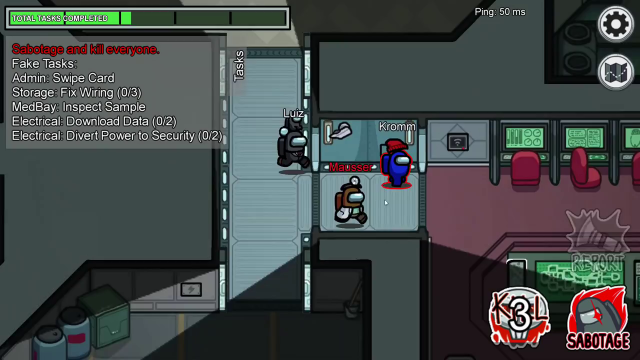

In [89]:
image = ex['image']
image

In [92]:
image.mode

'RGB'

In [5]:
model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/home/ra02983/.local/lib/python3.8/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [75]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.3882,  0.3961,  0.3961,  ...,  0.9451,  0.9451,  0.9373],
          [ 0.3961,  0.4118,  0.4118,  ...,  0.9608,  0.9608,  0.9529],
          [ 0.4039,  0.4039,  0.4118,  ...,  0.9608,  0.9608,  0.9529],
          ...,
          [ 0.2392,  0.2471,  0.2392,  ...,  0.1294,  0.1294,  0.1373],
          [ 0.2392,  0.2549,  0.2549,  ...,  0.1294,  0.1294,  0.1373],
          [ 0.2157,  0.2392,  0.2471,  ...,  0.0980,  0.0902,  0.0980]],

         [[ 0.3020,  0.3098,  0.3098,  ...,  0.9608,  0.9608,  0.9529],
          [ 0.3098,  0.3255,  0.3255,  ...,  0.9922,  0.9843,  0.9843],
          [ 0.3176,  0.3176,  0.3255,  ...,  1.0000,  0.9922,  0.9922],
          ...,
          [ 0.1451,  0.1451,  0.1373,  ...,  0.1765,  0.1765,  0.1922],
          [ 0.1451,  0.1529,  0.1529,  ...,  0.1765,  0.1843,  0.1843],
          [ 0.1216,  0.1373,  0.1451,  ...,  0.1451,  0.1451,  0.1451]],

         [[-0.1843, -0.1765, -0.1765,  ...,  0.5922,  0.5922,  0.5843],
          [-0

In [6]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['label']
    return inputs

In [7]:
prepared_ds = dataset.with_transform(transform)

In [8]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.4667, -0.4667, -0.4667,  ..., -0.4667, -0.4667, -0.4667],
          [-0.4667, -0.4667, -0.4667,  ..., -0.4667, -0.4667, -0.4667],
          [-0.4667, -0.4667, -0.4667,  ..., -0.4667, -0.4667, -0.4667]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.4667, -0.4667, -0.4667,  ..., -0.4667, -0.4667, -0.4667],
          [-0.4667, -0.4667, -0.4667,  ..., -0.4667, -0.4667, -0.4667],
          [-0.4667, -0.4667, -0.4667,  ..., -0.4667, -0.4667, -0.4667]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1

In [18]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [10]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

/tmp/ipykernel_126923/2425197347.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [11]:
from transformers import ViTForImageClassification

labels = dataset['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [25]:
prepared_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [26]:
from sklearn.model_selection import train_test_split

# Create the validation split
prepared_ds['validation'] = prepared_ds['train'].train_test_split(test_size=0.2, shuffle=True)

In [28]:
prepared_ds['validation']

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2000
    })
})

In [29]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds['validation']["train"],
    eval_dataset=prepared_ds['validation']["test"],
    tokenizer=feature_extractor,
)


In [30]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/home/ra02983/.local/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
100,0.024700,0.046949,0.988500
200,0.108400,0.082147,0.977500
300,0.094000,0.057366,0.987000
400,0.054700,0.029138,0.992000
500,0.014100,0.021630,0.995000
600,0.003000,0.026590,0.994500
700,0.032500,0.017105,0.995000
800,0.002400,0.018287,0.995500
900,0.005000,0.018528,0.996000
1000,0.001600,0.033879,0.994000


***** train metrics *****
  epoch                    =          4.0
  total_flos               = 2309606847GF
  train_loss               =       0.0238
  train_runtime            =   1:11:32.07
  train_samples_per_second =        7.456
  train_steps_per_second   =        0.466


In [31]:
metrics = trainer.evaluate(prepared_ds['validation']["test"])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9965
  eval_loss               =     0.0113
  eval_runtime            = 0:00:55.02
  eval_samples_per_second =     36.348
  eval_steps_per_second   =      4.544


In [45]:
# Get predictions on a test dataset
predictions = trainer.predict(prepared_ds['validation']["test"])

# Access the predicted labels and associated logits
predicted_labels = predictions.predictions.argmax(axis=1)
logits = predictions.predictions

# Display the results
for i, label in enumerate(predicted_labels):
    print(f"Example {i + 1}: Predicted label - {label}")
    print(f"Logits: {logits[i]}")
    print("-------------------------")

Example 1: Predicted label - 8
Logits: [-0.890625   -1.1630859  -0.5683594  -0.5180664  -0.79052734 -0.9082031
 -0.88183594 -0.9165039   8.5390625  -0.82666016]
-------------------------
Example 2: Predicted label - 8
Logits: [-0.8881836  -0.6821289  -0.6254883  -0.83203125 -1.0517578  -0.8701172
 -0.8183594  -1.0302734   8.53125    -0.9301758 ]
-------------------------
Example 3: Predicted label - 0
Logits: [ 6.9648438  -1.6367188  -1.6279297   1.3974609  -0.2915039  -1.0166016
 -1.5029297  -0.58154297 -1.1308594   1.0605469 ]
-------------------------
Example 4: Predicted label - 8
Logits: [-0.9350586  -0.828125   -0.6694336  -0.8959961  -0.5708008  -0.9394531
 -0.93408203 -1.0068359   8.6015625  -0.72021484]
-------------------------
Example 5: Predicted label - 4
Logits: [-0.7973633  -0.89160156 -1.1201172  -1.0898438   8.3984375  -0.8564453
 -0.73828125 -0.77441406 -0.6928711  -1.0341797 ]
-------------------------
Example 6: Predicted label - 6
Logits: [-0.9663086  -1.2265625  -

In [48]:
prepared_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
    validation: DatasetDict({
        train: Dataset({
            features: ['image', 'label'],
            num_rows: 8000
        })
        test: Dataset({
            features: ['image', 'label'],
            num_rows: 2000
        })
    })
})

In [63]:
prepared_ds['validation']["test"][0]['pixel_values']

tensor([[[-0.6863, -0.6863, -0.6941,  ..., -0.8902, -0.8902, -0.9059],
         [-0.6392, -0.1922,  0.0431,  ..., -0.8902, -0.8902, -0.9059],
         [-0.6471, -0.4588, -0.3569,  ..., -0.8902, -0.8902, -0.9059],
         ...,
         [-0.2235, -0.2784, -0.6941,  ..., -1.0000, -1.0000, -0.9686],
         [-0.2549, -0.6235, -0.9765,  ..., -1.0000, -0.9922, -0.9843],
         [-0.6784, -0.9686, -1.0000,  ..., -0.9922, -1.0000, -0.9922]],

        [[-0.7882, -0.7804, -0.7961,  ..., -0.8824, -0.8824, -0.9059],
         [-0.7412, -0.2706, -0.0275,  ..., -0.8824, -0.8824, -0.9059],
         [-0.7490, -0.5529, -0.4510,  ..., -0.8824, -0.8824, -0.9059],
         ...,
         [ 0.1216,  0.0118, -0.5451,  ..., -0.7882, -0.7804, -0.8275],
         [ 0.0039, -0.4980, -0.9451,  ..., -0.7961, -0.8039, -0.8353],
         [-0.5294, -0.9529, -1.0000,  ..., -0.8196, -0.8275, -0.8510]],

        [[-0.8431, -0.8431, -0.8275,  ..., -0.6471, -0.6471, -0.6706],
         [-0.7882, -0.3333, -0.0902,  ..., -0

In [82]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


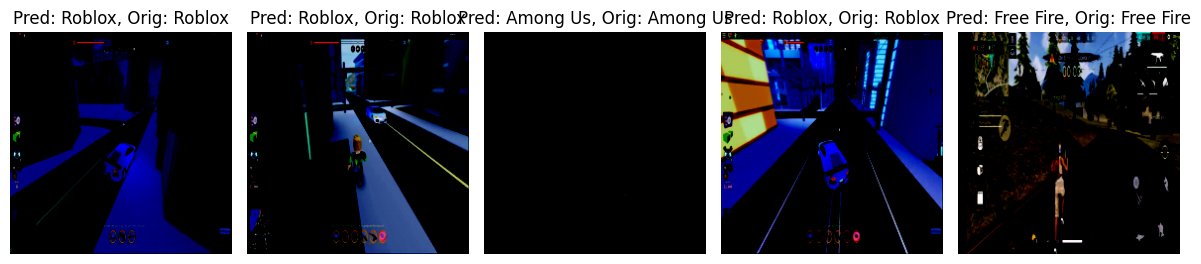

In [79]:


# Assuming you have already defined and configured the trainer object

# Get predictions on a test dataset
predictions = trainer.predict(prepared_ds['validation']["test"])

# Access the predicted labels and original labels
predicted_labels = predictions.predictions.argmax(axis=1)[:5]
original_labels = prepared_ds['validation']["test"][:5]['labels']

# Display the images with predicted and original labels
num_examples = len(predicted_labels)

# Create a grid of subplots for displaying the images
fig, axes = plt.subplots(nrows=5, ncols=num_examples, figsize=(12, 4))
labels = dataset['train'].features['label']

for i in range(num_examples):
    # Get the image and convert it to a numpy array
    image = prepared_ds['validation']["test"][i]['pixel_values'].numpy().transpose((1, 2, 0))

    # Plot the image with the predicted and original labels
    axes[i].imshow(image)
    axes[i].set_title(f"Pred: {labels.int2str(int(predicted_labels[i]))}, Orig: {labels.int2str(int(original_labels[i]))}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


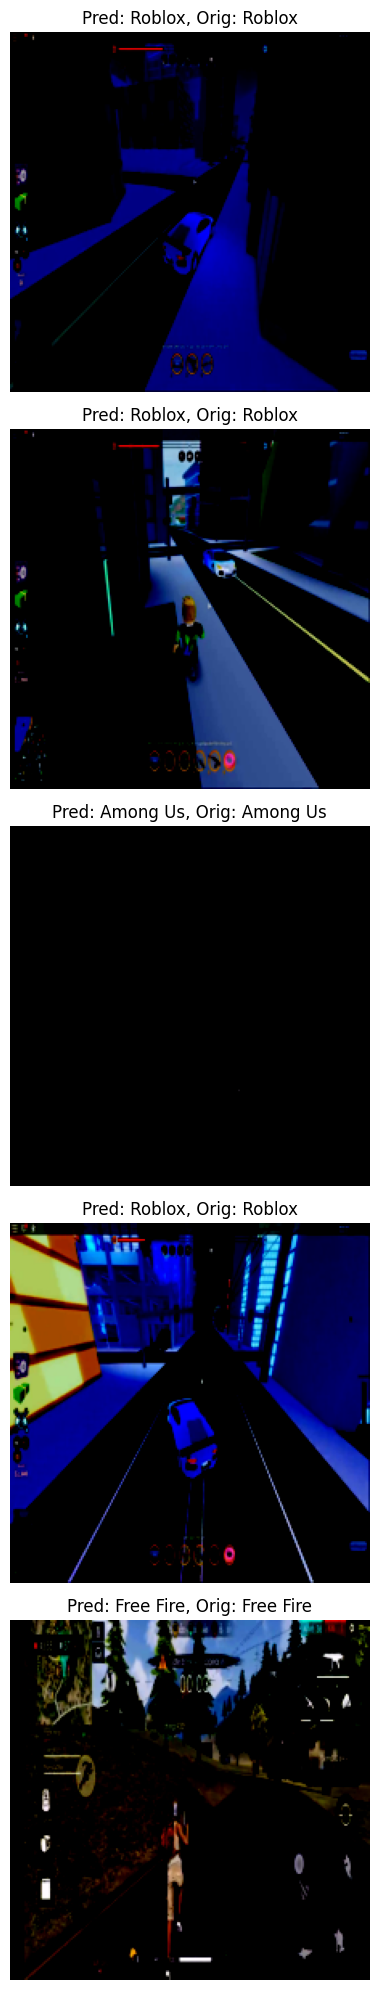

In [97]:


# Create a grid of subplots for displaying the images
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 20))
labels = dataset['train'].features['label']

for i in range(num_examples):
    # Get the image and convert it to a numpy array
    image = prepared_ds['validation']["test"][i]['pixel_values'].numpy().transpose((1, 2, 0))

    # Plot the image with the predicted and original labels
    axes[i].imshow(image)
    axes[i].set_title(f"Pred: {labels.int2str(int(predicted_labels[i]))}, Orig: {labels.int2str(int(original_labels[i]))}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()